i: 0
i: 100
i: 200
i: 300
i: 400
i: 500
i: 600
i: 700
i: 800
i: 900
i: 1000
i: 1100
i: 1200
i: 1300


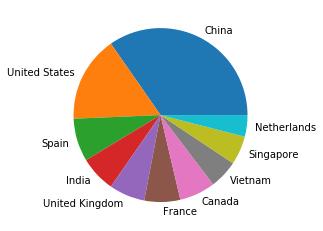

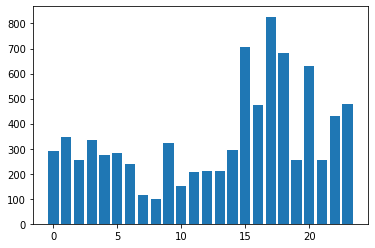

In [12]:
import matplotlib.pyplot as plt
from urllib import request
from collections import Counter
import time
import json
times = []
hours = []
ips = []
uniques = []
countries = []

with open("oct2019.txt", "r") as file:
    for line in file:
        times.append(line.split()[6])
        ips.append(line.split()[2])

for ip in ips:
    if ip not in uniques : uniques.append(ip)

for i in range(0, len(uniques), 100):
    print("i:", i)
    pars = [{"query" : ip, "fields" : "country"} for ip in uniques[i:i+100]]
    data = json.dumps(pars)
    data = data.encode('ascii')
    with request.urlopen("http://ip-api.com/batch", data) as req:
        countries.append(req.read())
    time.sleep(5)
jsonResList = [json.loads(r) for r in countries]
c = Counter(d['country'] for d in jsonResList[0])
top10 = c.most_common(10)

pie = [x[1] for x in top10]
labels = [x[0] for x in top10]
plt.pie(pie, labels=labels)
plt.savefig('hackpie.png')
plt.show()
plt.close()

for i in range(0, 24):
    if i < 10 : h = "0" + str(i)
    else : h = str(i)
    hours.append(len([x for x in times if x.split(":")[0] == h]))
h=list(range(0, 24))
plt.bar(h, hours)
plt.savefig('hackbar.png')